In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv("../df_cleaned.csv")


y = df["BRCAstatesNew"]
X = df.drop(["BRCAstatesNew"], axis =1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [6]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [8]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.995987963891675

In [10]:
# model tuning
rf= RandomForestClassifier()

In [14]:
rf_params = {"n_estimators": [100, 200, 500, 1000],
             "max_features": [3,10,25,48,70,100],
             "min_samples_split": [2,5,10,20,40,80]}

In [16]:
rf_cv_model = GridSearchCV(rf, rf_params, n_jobs =-1).fit(X_train, y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [17]:
rf_cv_model.best_params_

{'max_features': 48, 'min_samples_split': 2, 'n_estimators': 100}

In [20]:
rf_tuned = RandomForestClassifier(max_features=48, min_samples_split=2,n_estimators=100).fit(X_train, y_train)

In [22]:
y_pred = rf_tuned.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.9989969909729187

In [28]:
rf_tuned.feature_importances_

array([2.03987838e-01, 1.38888384e-01, 0.00000000e+00, 1.32914305e-02,
       3.39929526e-01, 2.70298891e-01, 8.84949597e-04, 1.89439856e-03,
       2.65843688e-04, 1.93700122e-05, 8.31079246e-05, 0.00000000e+00,
       1.54442477e-04, 0.00000000e+00, 2.68148034e-04, 2.02548981e-05,
       1.19683954e-04, 2.26653474e-05, 2.39589716e-04, 4.03193666e-04,
       8.87280595e-04, 6.93465181e-05, 6.76421645e-05, 1.41230807e-04,
       2.33338957e-03, 2.28130755e-04, 6.72432046e-05, 5.13280155e-04,
       3.80990552e-04, 2.85643035e-04, 1.76400087e-04, 0.00000000e+00,
       4.54247691e-04, 0.00000000e+00, 9.21039268e-05, 9.44008911e-05,
       3.43884452e-04, 4.39274999e-04, 4.58428110e-04, 1.77774278e-04,
       1.52216655e-04, 1.48542686e-04, 0.00000000e+00, 1.72168977e-04,
       0.00000000e+00, 1.58868741e-04, 2.02363491e-04, 1.54756711e-04,
       2.49710753e-04, 2.85849821e-05, 7.09551701e-05, 0.00000000e+00,
       3.17025200e-04, 7.51494748e-05, 3.93043782e-04, 1.63118493e-04,
      

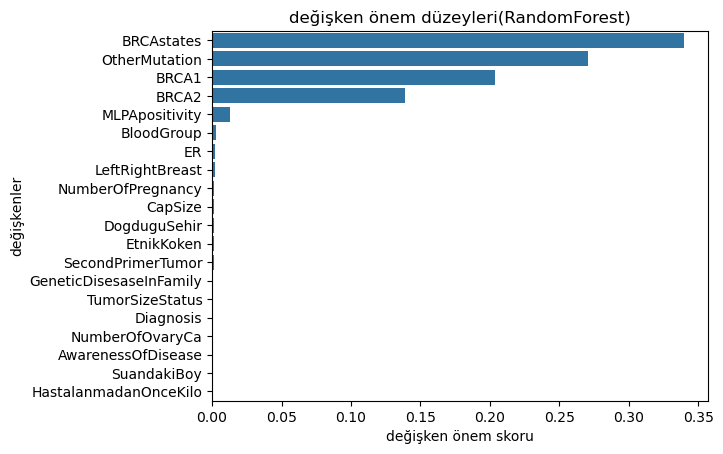

In [45]:
# değişken önem düzeyi belirleme
feature_imp = pd.Series(rf_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("değişken önem skoru")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri(RandomForest)")
plt.show()